Assigment 5

**Ground ground chirps**

In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}

df = pd.DataFrame(ground_cricket_data)

df.head()

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
print (df.shape)

(15, 2)


In [ ]:
df.describe()

,Chirps_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df.Chirps_Second.quantile(0.75)

17.15

In [ ]:
iqr = df.Chirps_Second.quantile(0.75) - df.Chirps_Second.quantile(0.25)
upper_threshold = df.Chirps_Second.quantile(0.75)+(1.5*iqr) #q3 + 1.5iqr
lower_threshold = df.Chirps_Second.quantile(0.25)-(1.5*iqr) #q3 - 1.5iqr
upper_threshold,lower_threshold  

(19.699999999999996, 12.9)

In [ ]:
df.isnull().sum()

Chirps_Second         0
Ground_Temperature    0
dtype: int64

In [ ]:
df.drop_duplicates()
df.shape

(15, 2)

In [ ]:
df.dtypes

Chirps_Second         float64
Ground_Temperature    float64
dtype: object

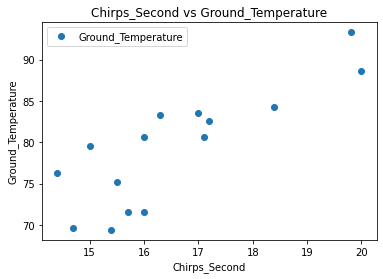

In [ ]:
df.plot(x='Chirps_Second', y= 'Ground_Temperature', style='o')
plt.title('Chirps_Second vs Ground_Temperature')
plt.xlabel('Chirps_Second')
plt.ylabel('Ground_Temperature')
plt.show()

In [ ]:
df.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [ ]:
df.Chirps_Second.values

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 16. , 17. , 14.4])

In [ ]:
X = df.loc[:, ['Chirps_Second']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Ground_Temperature'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape , X_test.shape

((10, 1), (5, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.36934709],
       [-0.82559939],
       [ 0.2607156 ],
       [-0.44538914],
       [ 1.02113609]])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print (regressor.intercept_)

print(regressor.coef_)

78.86000000000001
[6.54982757]


In [ ]:
regressor.predict([[20]])

array([209.85655135])

In [ ]:
y_pred= regressor.predict(X_test)
y_pred

array([81.27915978, 73.45246637, 80.5676422 , 75.94277791, 85.54826528])

In [ ]:
dataset= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset

,Actual,Predicted
0,82.6,81.279160
1,79.6,73.452466
2,83.5,80.567642
3,71.6,75.942778
4,84.3,85.548265


In [138]:
regressor.predict([[18]])

array([196.75689621])

In [ ]:
df

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
from sklearn import metrics
print('R2-Score:', metrics.r2_score (y_test,y_pred))

R2-Score: 0.36352548474752133
